# Getting Data from OSM

OpenStreetMap is a collaborative project to create a free editable map of the world. We are going to use this service to get the coordinates for all the landcovers annotated as agricultural see this link for diffirent tags of [agricultural landuse](https://wiki.openstreetmap.org/wiki/Landuse#key:landuse_values_not_used_to_indicate_land_use_in_all_cases).

We are going to use [osmnx](https://osmnx.readthedocs.io/en/stable/) which provid a way to communicate with OSM services through Python code which is more convenient.

In [1]:
import geopandas as gpd
import osmnx as ox
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry import box
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer

### Read The GeoJson containing the counties with high risk of desert locust attack
We are going to use a GeoJson file that contains the counties with high risk of DL attacks to get the coordinates of any land covers annotated as (farms, meadow, orchard, vineyard, greenhouse_horticulture, farmyard). Note that these annotation were taken from the OSM wiki page.

In [7]:
# Loading the geojson file
data_frame = gpd.read_file("C:/Users/rasha/OneDrive/Documents/GitHub/KenyaRedCross/Data/kenyan-counties.geojson")

In [8]:
# Take a look at the data
data_frame.head()

,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
0,1,5.677,15.047,2,1,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ..."
1,2,6.177,11.974,3,2,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ..."
2,3,2.117,7.355,4,3,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.97860, ..."
3,4,4.610,9.838,5,4,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ..."
4,5,0.740,5.030,6,5,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ..."


### Extracting Tharaka county from our GeoJSON

In [12]:
tharaka_nithi_geom = data_frame.loc[data_frame.COUNTY.isin(['Tharaka'])].geometry

<AxesSubplot:>

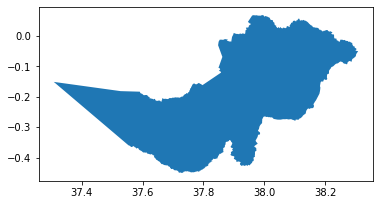

In [15]:
tharaka_nithi_geom.plot()

In [16]:
# Storr the result in a geojson
tharaka_nithi_geom.to_file("C:/Users/rasha/OneDrive/Documents/GitHub/KenyaRedCross/Data/tharaka_nithi.geojson", driver='GeoJSON')

In [17]:
# Storr the result in a geojson
tharaka_nithi_geom.to_file("C:/Users/rasha/OneDrive/Documents/GitHub/KenyaRedCross/Data/tharaka_nithi.sh", driver='Shapefile')

Find the bounding box for the region of interest. We'll use this to extract images from OSM.

In [ ]:
# Creating a bounding box that will include all the counties we have from the previous GeoJson
x_min, y_min, x_max, y_max = data_frame.total_bounds
bbox = [x_min, y_min, x_max, y_max]
# Convet bbox to Polygon
kenya_poly =box(*bbox)

C:\Users\rasha\.conda\envs\omdena_malaria\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now we are going to use osmnx to get the coordinates for the land covers we specify below. This may take a few seconds to a minute depending on the amount of annotated data available (hopefully a lot) and the area of the region.

In [ ]:
landuse = ox.geometries.geometries_from_polygon(kenya_poly, tags={'landuse':['farmland', 'meadow', 'orchard', 'vineyard', 'greenhouse_horticulture']})

In [ ]:
len(landuse)

C:\Users\rasha\.conda\envs\omdena_malaria\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


106883

Now we have successfully fetched the annotated data from OSM. We can use these coordinates as our region of interet and use it to get data from Google earth engine or any other source.

<AxesSubplot:>

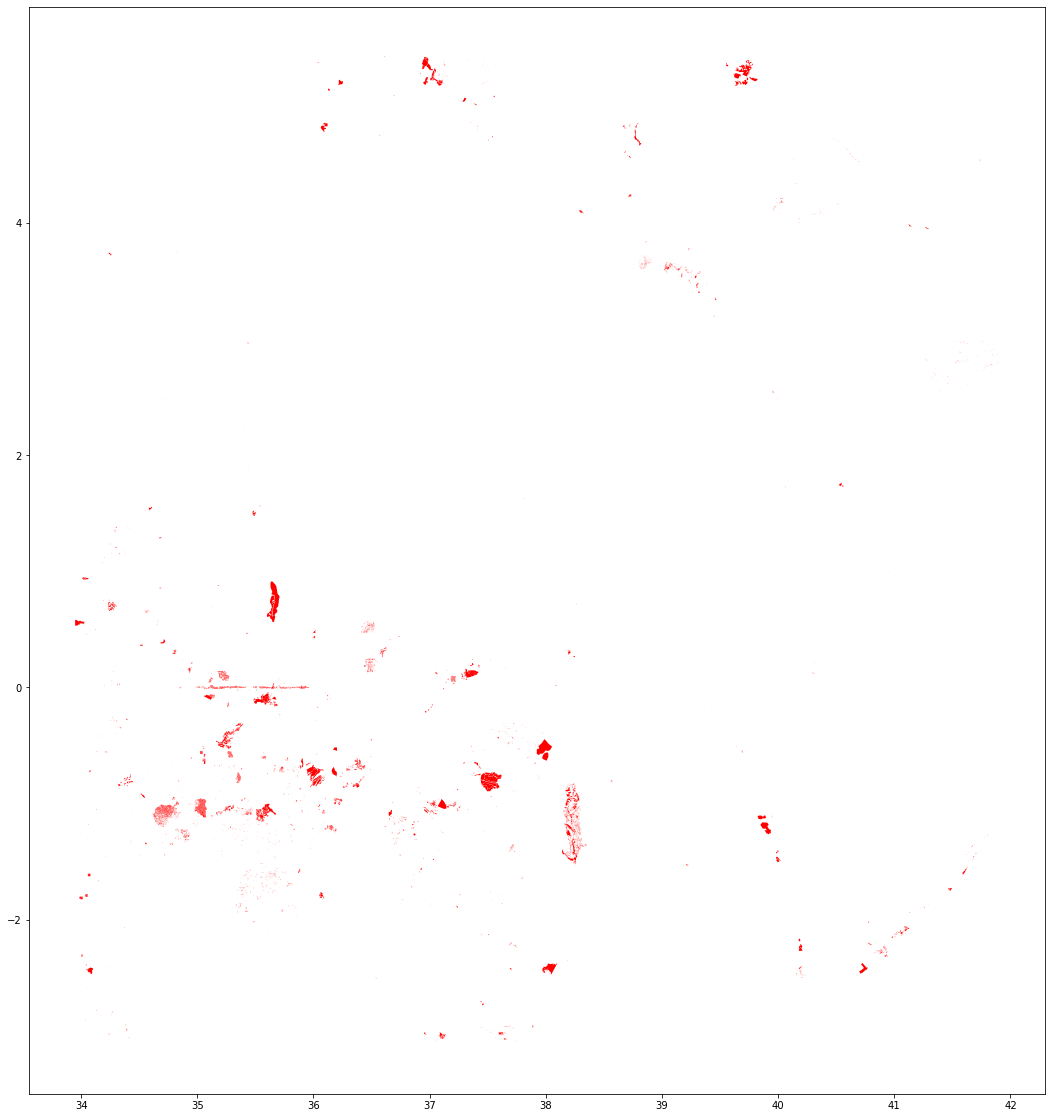

In [ ]:
landuse.plot(figsize=(20, 20), markersize=1, color='red')

In [ ]:
# Save our features by chunk
landuse.to_csv('high_risk_agricultural_landuse.csv')

C:\Users\rasha\.conda\envs\omdena_malaria\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\rasha\.conda\envs\omdena_malaria\lib\site-packages\aiohttp\helpers.py:107: DeprecationWarning: "@coroutine" decorator is deprecated since Python 3.8, use "async def" instead
  def noop(*args, **kwargs):  # type: ignore


In [ ]:
landuse.head()

,unique_id,osmid,element_type,nodes,landuse,geometry,ways,type,crop,name,...,acreage,measurement,email,imagery_used,ele,is_in,is_in:country,wheelchair,wetland,notes
0,way/474833871,474833871,way,"[4687011425, 4687011426, 4687011427, 468701142...",farmland,"POLYGON ((33.99580 -2.68132, 33.99521 -2.68136...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/483173675,483173675,way,"[4759266718, 4759266719, 4759266720, 475926672...",farmland,"POLYGON ((34.08100 -2.90305, 34.08057 -2.90391...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/483173676,483173676,way,"[4759266722, 4759266723, 4759266724, 475926672...",farmland,"POLYGON ((34.08018 -2.90464, 34.08047 -2.90400...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/487806944,487806944,way,"[4802195151, 4802195152, 4802195153, 480219515...",farmland,"POLYGON ((34.09547 -2.87501, 34.09522 -2.87537...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/487806945,487806945,way,"[4802195157, 4802195158, 4802195159, 480219516...",farmland,"POLYGON ((34.09559 -2.87511, 34.09572 -2.87505...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(landuse)

C:\Users\rasha\.conda\envs\omdena_malaria\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


31839